# Lab 3: Clustering

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno

In [2]:
col_list = ["id", "price", "room_type", "bathrooms_text", "accommodates", "availability_30", "latitude", "longitude", "neighbourhood_group_cleansed", "number_of_reviews", "reviews_per_month"]

In [3]:
# load data
listings=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/airbnb/main/airbnb_nyc_listings.csv?token=ARN5NNHQQO5DGH6T72FBV2DBGD342", usecols=col_list)

listings.head()

,id,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,price,availability_30,number_of_reviews,reviews_per_month
0,2595,Manhattan,40.75356,-73.98559,Entire home/apt,1,1 bath,$150.00,6,48,0.34
1,3831,Brooklyn,40.68494,-73.95765,Entire home/apt,3,1 bath,$75.00,0,408,5.09
2,5121,Brooklyn,40.68535,-73.95512,Private room,2,NaN,$60.00,30,50,0.55
3,5136,Brooklyn,40.66265,-73.99454,Entire home/apt,4,1.5 baths,$275.00,7,1,0.01
4,5178,Manhattan,40.76457,-73.98317,Private room,2,1 bath,$61.00,3,485,3.63


In [4]:
# Check data info
listings.dtypes

id                                int64
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
room_type                        object
accommodates                      int64
bathrooms_text                   object
price                            object
availability_30                   int64
number_of_reviews                 int64
reviews_per_month               float64
dtype: object

# Cleaning Price

In [5]:
print(listings.price.dtypes) #initial type is object
print(listings.price.loc[[299]]) #original value "$2,500.00"
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
print(listings.price.dtypes) #transformed type is float64
print(listings.price.loc[[299]]) #new value is 2500.0

object
299    $2,500.00
Name: price, dtype: object
float64
299    2500.0
Name: price, dtype: float64


# Cleaning the bathroom

In [6]:
#convert nAn values to 'NA' for parsing, will change back to nAn after splitting
listings['bathrooms_text'] = listings['bathrooms_text'].astype(object).replace(np.nan, 'NA')

#Create translation dictionary since description formats are not consistent
transdict = {'1 bath': '1 private', 
             'NA': 'NA',
             '1.5 baths': '1.5 private',
             '1 shared bath': '1 shared', 
             '1 private bath': '1 private',
             'Shared half-bath': '0.5 shared',
             '2 baths': '2 private',
             '1.5 shared baths': '1.5 shared',
             '3 baths': '3 private',
             'Half-bath': '0.5 private',
             '2.5 baths': '2.5 private', 
             '2 shared baths': '2 shared',
             '0 baths' : '0 private',
             '4 baths':'4 private', 
             '0 shared baths': '0 shared',
             'Private half-bath': '0.5 private',  
             '4.5 baths' :'4.5 private', 
             '5.5 baths': '5.5 private' , 
             '2.5 shared baths': '2.5 shared',
             '3.5 baths': '3.5 private', 
             '15.5 baths': '15.5 private', 
             '5 baths': '5 private', 
             '3 shared baths': '3 shared', 
             '4 shared baths': '4 shared',
             '6 baths': '6 private', 
             '3.5 shared baths': '3.5 private', 
             '6 shared baths' : '6 shared',
             '6.5 shared baths': '6.5 shared', 
             '4.5 shared baths' :'4.5 private',
             '5.5 shared baths' : '5.5 private', 
             '7.5 baths': '7.5 private', 
             '5 shared baths': '5 shared',
             '6.5 baths': '6.5 private', 
             '8 baths': '8 private', 
             '7 shared baths':'7 shared', 
             '7 baths': '7 private', 
             '10 baths': '10 private'}

#use trandict to iterate over bathrooms_text column
listings['bathrooms_text'] = [transdict[letter] for letter in listings['bathrooms_text']]

#use str.split to create two new columns 'num_baths' and 'bath_type'
listings[['num_baths','bath_type']] = listings['bathrooms_text'].str.split(' ', 1, expand = True)

#For num_baths convert 'NA' values back to nan and convert type to float
listings['num_baths'] = listings['num_baths'].astype(object).replace( 'NA',np.nan)
listings['num_baths'] = listings['num_baths'].astype(np.float16)

#For bath type convert 'NA' values back to nan and convert type to category
listings.bath_type.fillna(value=np.nan, inplace=True)
listings['bath_type'] = listings['bath_type'].astype('category')

# Drop bathroom_text

In [7]:
#Confirm conversions for bathroom text
print(listings.num_baths.dtypes) #transformed type is float16
print(listings.num_baths.unique())
print(listings.bath_type.dtypes) #transformed type is category
print(listings.bath_type.unique()) 

#Drop original bathrooms_text column now that replaced by two new variables
listings.drop('bathrooms_text', axis=1, inplace=True)

float16
[ 1.   nan  1.5  0.5  2.   3.   2.5  0.   4.   4.5  5.5  3.5 15.5  5.
  6.   6.5  7.5  8.   7.  10. ]
category
['private', NaN, 'shared']
Categories (2, object): ['private', 'shared']


# Data type dict

In [8]:
convert_dict = {
'neighbourhood_group_cleansed': 'category',
'room_type': 'category',
'accommodates': 'Int16',
'price': 'float64',
'availability_30': 'Int16',
'num_baths': 'float64',
'bath_type': 'category',
"number_of_reviews":"int16", 
"reviews_per_month": "float64"
               }
  
listings = listings.astype(convert_dict, errors='ignore')
print(listings.dtypes)

id                                 int64
neighbourhood_group_cleansed    category
latitude                         float64
longitude                        float64
room_type                       category
accommodates                       Int16
price                            float64
availability_30                    Int16
number_of_reviews                  int16
reviews_per_month                float64
num_baths                        float64
bath_type                       category
dtype: object


# Check Missing Values

In [9]:
listings.isna().sum()

id                                 0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
price                              0
availability_30                    0
number_of_reviews                  0
reviews_per_month               9415
num_baths                        109
bath_type                        109
dtype: int64

# Drop Missing Values and Duplicate rows

In [10]:
print("Dataframe Size before dropping NA: ",listings.shape)
listings.dropna(inplace= True)
print("Dataframe Size after dropping NA: ",listings.shape)

print(listings.isna().sum())

# Check for duplicate rows
print('Duplicate rows: ',listings.duplicated(keep='first').sum())

Dataframe Size before dropping NA:  (36724, 12)
Dataframe Size after dropping NA:  (27243, 12)
id                              0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
room_type                       0
accommodates                    0
price                           0
availability_30                 0
number_of_reviews               0
reviews_per_month               0
num_baths                       0
bath_type                       0
dtype: int64
Duplicate rows:  0


In [11]:
Categoricals_to_convert = ['neighbourhood_group_cleansed','room_type','bath_type']

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(listings[Categoricals_to_convert],drop_first=True)

#dropping original columns
listings_df = listings.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
listings_df = pd.concat([listings_df,dummies],axis=1)


listings_df.head()

,id,latitude,longitude,accommodates,price,availability_30,number_of_reviews,reviews_per_month,num_baths,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,bath_type_shared
0,2595,40.75356,-73.98559,1,150.0,6,48,0.34,1.0,0,1,0,0,0,0,0,0
1,3831,40.68494,-73.95765,3,75.0,0,408,5.09,1.0,1,0,0,0,0,0,0,0
3,5136,40.66265,-73.99454,4,275.0,7,1,0.01,1.5,1,0,0,0,0,0,0,0
4,5178,40.76457,-73.98317,2,61.0,3,485,3.63,1.0,0,1,0,0,0,1,0,0
5,5203,40.80380,-73.96751,1,75.0,0,118,0.90,1.0,0,1,0,0,0,1,0,1


In [12]:
#Split Modeling and Validation Datasets
from sklearn.model_selection import train_test_split

listings_cleaned = listings_df[(listings_df.price >= 14) & (listings_df.price < 5000)]
listings_cleaned['price_log'] = np.log10(listings_cleaned['price'])

listings_modeling, listings_validation = train_test_split(listings_cleaned, test_size=0.1, random_state=42)

print("Size of modeling set (to be CV split): ",listings_modeling.shape)
print("Size of hold back validation set: ",listings_validation.shape)

Size of modeling set (to be CV split):  (24499, 18)
Size of hold back validation set:  (2723, 18)


<ipython-input-12-398be16cab7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_cleaned['price_log'] = np.log10(listings_cleaned['price'])


# Attention RICK !!!!!!!!!!


### Reducing data size BELOW
___
**Splitting** the original data set into a **smaller dataframe** 

to run on **full size** data just remove this cell and run again. 
___




In [13]:
#listings_modeling, listings_validation = train_test_split(listings_cleaned, test_size=0.1, random_state=42)

#df_smol =  listings_cleaned.sample(frac = 0.3, replace=False, random_state=42)



#listings_modeling, listings_validation = train_test_split(df_smol, test_size=0.1, random_state=42)

REMOVE THE **ABOVE CELL** TO RUN ON FULL DATA SET

In [14]:
from sklearn.preprocessing import StandardScaler

Lat = listings_modeling.latitude
Long = listings_modeling.longitude

LatLong = np.column_stack((Lat, Long))

LatLong.shape



(24499, 2)

In [15]:
Lat_val = listings_validation.latitude
Long_val = listings_validation.longitude

LatLong_val = np.column_stack((Lat_val, Long_val))

LatLong_val.shape

(2723, 2)

Take a small sample to help with compute time for spectral clustering

In [31]:
#num_rows_2_sample = 1000

In [32]:
#= LatLong[np.random.choice(LatLong.shape[0], num_rows_2_sample, replace=False)]

# Spectral Clustering

Base Spectral Cluster model from Dr. Larson's Notebook using default settings from SKLEAN 

* n_clusters default is 8 etc etc 

In [16]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

#object to cluster on
# LatLong = np.column_stack((Lat, Long))

#nclust = n_clusters default is 8 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


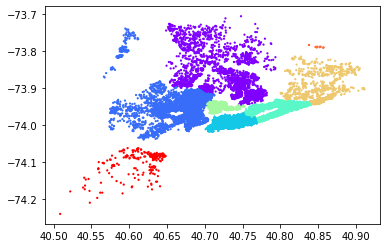

In [17]:
#default model

#reduced to a 7350 sample to not crash my poor virgin computer that runs on a hamster wheel. 
X= LatLong

#running with default n_clusters, assign_labels = 'kmeans' default
spc = SpectralClustering(affinity = 'nearest_neighbors')
labels = spc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,
                    cmap=plt.cm.rainbow, s=5, linewidths=0)

plt.show()

In [18]:
from pprint import pprint

pprint(spc.get_params())


{'affinity': 'nearest_neighbors',
 'assign_labels': 'kmeans',
 'coef0': 1,
 'degree': 3,
 'eigen_solver': None,
 'eigen_tol': 0.0,
 'gamma': 1.0,
 'kernel_params': None,
 'n_clusters': 8,
 'n_components': None,
 'n_init': 10,
 'n_jobs': None,
 'n_neighbors': 10,
 'random_state': None,
 'verbose': False}


### Self tuned clustering and optimal number of clusters approximation
The idea behind the self tuning spectral clustering is determine the optimal number of clusters and also the similarity metric σi used in the computation of the affinity matrix.



In [19]:
from scipy.spatial.distance import pdist, squareform
def getAffinityMatrix(coordinates, k = 7):
    """
    Calculate affinity matrix based on input coordinates matrix and the numeber
    of nearest neighbours.
    
    Apply local scaling based on the k nearest neighbour
        References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    """
    # calculate euclidian distance matrix
    dists = squareform(pdist(coordinates)) 
    
    # for each row, sort the distances ascendingly and take the index of the 
    #k-th position (nearest neighbour)
    knn_distances = np.sort(dists, axis=0)[k]
    knn_distances = knn_distances[np.newaxis].T
    
    # calculate sigma_i * sigma_j
    local_scale = knn_distances.dot(knn_distances.T)

    affinity_matrix = dists * dists
    affinity_matrix = -affinity_matrix / local_scale
    # divide square distance matrix by local scale
    affinity_matrix[np.where(np.isnan(affinity_matrix))] = 0.0
    # apply exponential
    affinity_matrix = np.exp(affinity_matrix)
    np.fill_diagonal(affinity_matrix, 0)
    return affinity_matrix


Can we use this ⭣ affinity matrix in the Spectral clustering call e.g.,  SpectralClustering(n_clusters = 105, affinity = affinity_matrix .... ) ??? 


I did not work when i tried but i don't know why... hmm  

In [20]:
affinity_matrix = getAffinityMatrix(X, k = 7)

<ipython-input-19-165205f7487b>:23: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix = -affinity_matrix / local_scale
<ipython-input-19-165205f7487b>:23: RuntimeWarning: invalid value encountered in true_divide
  affinity_matrix = -affinity_matrix / local_scale


### Eigengap heuristic for finding the optimal number of clusters

This paper [A Tutorial on Spectral Clustering — Ulrike von Luxburg](https://www.kyb.tuebingen.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5B0%5D.pdf) proposes an approach based on perturbation theory and spectral graph theory to calculate the optimal number of clusters. [GitHub code here](https://github.com/ciortanmadalina/high_noise_clustering/blob/master/spectral_clustering.ipynb). Eigengap heuristic suggests the number of clusters k is usually given by the value of k that maximizes the eigengap (difference between consecutive eigenvalues). The larger this eigengap is, the closer the eigenvectors of the ideal case and hence the better spectral clustering works.

In [21]:
import scipy
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
from numpy import linalg as LA
def eigenDecomposition(A, plot = True, topK = 5):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
#     eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues, eigenvectors = LA.eig(L)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

<ipython-input-19-165205f7487b>:23: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix = -affinity_matrix / local_scale
<ipython-input-19-165205f7487b>:23: RuntimeWarning: invalid value encountered in true_divide
  affinity_matrix = -affinity_matrix / local_scale


Optimal number of clusters [ 368 1967 2242 2520 2799]


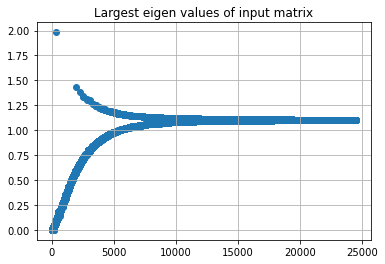

In [22]:
# X here is taking LatLong_smol
# the resulting egien vector graph will be different on the full data set. When I ran it last night on my Chad computer
# I got [369 1974 2252 2529 2804]
# But even when i run it on the 1000 samples i get different values everytime. 

affinity_matrix = getAffinityMatrix(X, k = 10)
k, _,  _ = eigenDecomposition(affinity_matrix)
print(f'Optimal number of clusters {k}')

#### Use Optimal number of clusters to apply to spectral model. Then use clusters in RF model 

This run i got 1138, 1154, 1169, 1218, 1416

Previous run when i sampled the numpy array instead of the pandas data framn i got 

 105, 159, 172, 184, 196
 
my **CHAD** computer got 369 1974 2252 2529 2804 on the full data set.

**Rick's** computer full data set returned: Optimal number of clusters [ 368 1967 2242 2520 2799]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


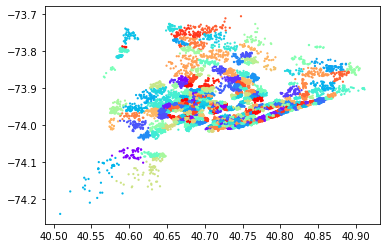

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


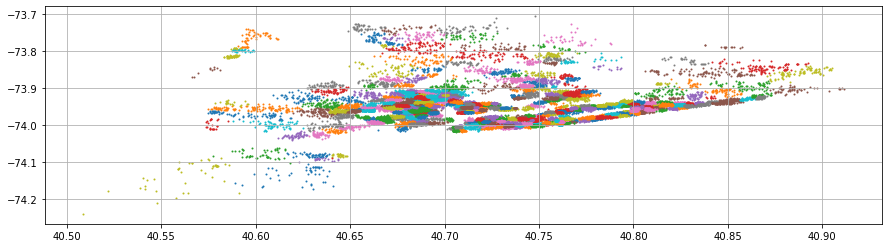

In [23]:
#--------Change parameters below this line---------------------------
# apply Eigengap heuristic results to spectral

# X = Latlong from df_smol for my virgin dell laptop
X= LatLong

#model name spc_eigen_tuned apply this object below
spc_eigen_tuned = SpectralClustering(n_clusters = 368, affinity = 'nearest_neighbors', n_neighbors = 10, n_jobs =-1)
labels = spc_eigen_tuned.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,
                    cmap=plt.cm.rainbow, s=5, linewidths=0)

plt.show()

#~~~~~~~~~~~~~~~~~ split into two chucks to work on error code~~~~~~~~~~~~~~~~~~~~~~~~

#~~~~~error code: Negative values in data passed to precomputed distance matrix.~~~~~~~~~~~~~~~~

#~~ troubleshooting procedures. Changed affinity parameter to 'nearest_neighbors'
#did not like 'precomputed_nearest_neighbors' recieved negative vales error code

#--------Change parameters above this line---------------------------
#calling the eigen tuned spectral clustersing
model_train = spc_eigen_tuned.fit(X)

#spectral has attribute predict usees .fit_predict
label = spc_eigen_tuned.fit_predict(X)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(15,4)) 
for i in u_labels:
#LatLong from df_smol here ↓ and there ------------⭨
    plt.scatter(LatLong[label == i , 0] , LatLong[label == i , 1] , label = i, s=1)
plt.grid()
plt.show()


In [24]:
Lat_val = listings_validation.latitude
Long_val = listings_validation.longitude

LatLong_val = np.column_stack((Lat_val, Long_val))

LatLong_val.shape

(2723, 2)

In [29]:
#spectral has attribute predict usees .fit_predict
label_val = model_train.fit_predict(LatLong_val) #LatLong from df_smol reduced data for my laptop

#Getting unique labels
 
u_labels = np.unique(label_val)
 
#plotting the results:

plt.figure(figsize=(15,4)) 
for i in u_labels:
#LatLong dfsmol here ↓ and there ---------------⭨
    plt.scatter(LatLong[label_val == i , 0] , LatLong[label_val == i , 1] , label = i, s=1)
plt.grid()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


IndexError: boolean index did not match indexed array along dimension 0; dimension is 24499 but corresponding boolean dimension is 2723

<Figure size 1080x288 with 0 Axes>

In [26]:
listings_modeling.head()

,id,latitude,longitude,accommodates,price,availability_30,number_of_reviews,reviews_per_month,num_baths,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,bath_type_shared,price_log
22186,34978738,40.67556,-73.84683,2,85.0,26,48,2.11,1.0,0,0,1,0,0,0,0,0,1.929419
23773,37884849,40.77652,-73.90729,3,82.0,10,75,3.76,1.0,0,0,1,0,0,1,0,0,1.913814
13418,19412140,40.69228,-73.93294,2,63.0,0,3,0.06,1.0,1,0,0,0,0,1,0,1,1.799341
34251,49749316,40.70748,-73.95399,2,150.0,2,3,1.91,1.0,1,0,0,0,0,0,0,0,2.176091
5432,7023583,40.80462,-73.96185,2,45.0,0,4,0.06,1.0,0,1,0,0,0,1,0,0,1.653213


In [27]:
listings_modeling['cluster'] = label
listings_modeling.head()

<ipython-input-27-ba05a5e91500>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_modeling['cluster'] = label


,id,latitude,longitude,accommodates,price,availability_30,number_of_reviews,reviews_per_month,num_baths,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,bath_type_shared,price_log,cluster
22186,34978738,40.67556,-73.84683,2,85.0,26,48,2.11,1.0,0,0,1,0,0,0,0,0,1.929419,158
23773,37884849,40.77652,-73.90729,3,82.0,10,75,3.76,1.0,0,0,1,0,0,1,0,0,1.913814,230
13418,19412140,40.69228,-73.93294,2,63.0,0,3,0.06,1.0,1,0,0,0,0,1,0,1,1.799341,189
34251,49749316,40.70748,-73.95399,2,150.0,2,3,1.91,1.0,1,0,0,0,0,0,0,0,2.176091,4
5432,7023583,40.80462,-73.96185,2,45.0,0,4,0.06,1.0,0,1,0,0,0,1,0,0,1.653213,145


In [30]:
listings_validation['cluster'] = label_val
listings_validation.head()

<ipython-input-30-640a7b98ed9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_validation['cluster'] = label_val


,id,latitude,longitude,accommodates,price,availability_30,number_of_reviews,reviews_per_month,num_baths,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,bath_type_shared,price_log,cluster
19179,29631729,40.71126,-73.95664,2,220.0,2,13,0.41,1.0,1,0,0,0,0,0,0,0,2.342423,318
32118,48018478,40.68995,-73.91612,2,65.0,0,8,1.55,1.0,1,0,0,0,0,1,0,1,1.812913,316
23021,36479723,40.74364,-73.87721,4,63.0,24,14,0.63,1.0,0,0,1,0,0,1,0,1,1.799341,315
1186,876355,40.81484,-73.95906,6,135.0,23,11,0.12,1.0,0,1,0,0,0,0,0,0,2.130334,38
16903,24825809,40.58443,-73.81251,2,130.0,7,89,2.36,1.0,0,0,1,0,0,1,0,1,2.113943,326


<AxesSubplot:xlabel='cluster', ylabel='Count'>

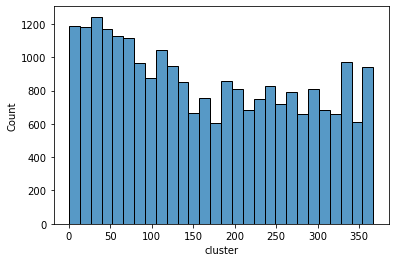

In [31]:
sns.histplot(data=listings_modeling, x="cluster")


(0.0, 1000.0)

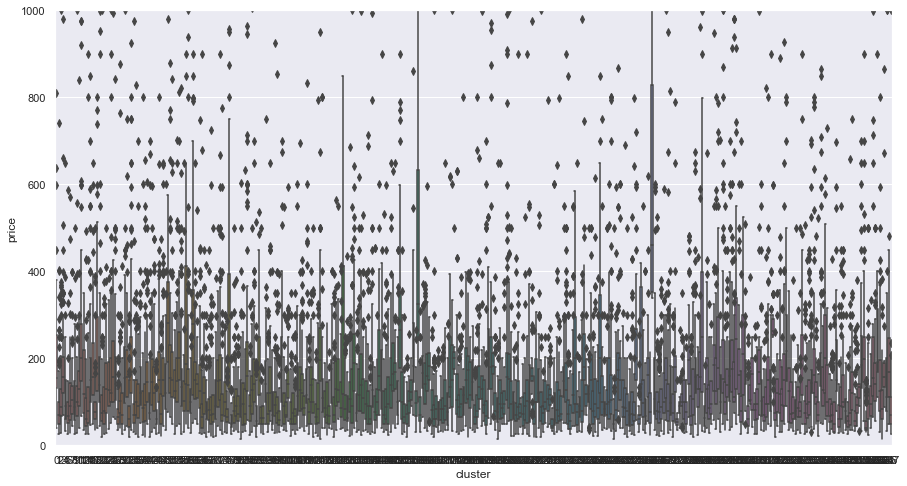

In [32]:
plt.figure(figsize=(15,8)) 
sns.set(font_scale=1)
sns.boxplot(x='cluster', y='price', data=listings_modeling)
plt.ylim(0, 1000)


(0.0, 400.0)

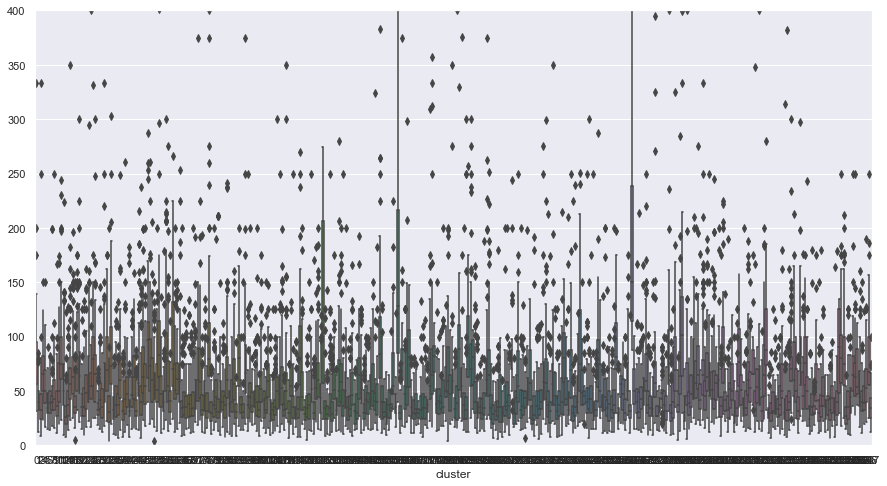

In [33]:
plt.figure(figsize=(15,8)) 
sns.set(font_scale=1)
sns.boxplot(x='cluster', y=listings_modeling.price / listings_modeling.accommodates, data=listings_modeling)
plt.ylim(0, 400)

In [34]:
#Create X and Y for modeling
X_price = listings_modeling.drop(['id','price','price_log','latitude','longitude','neighbourhood_group_cleansed_Brooklyn','neighbourhood_group_cleansed_Manhattan','neighbourhood_group_cleansed_Queens','neighbourhood_group_cleansed_Staten Island'],axis=1) #droping rating_max
Y_price_log = listings_modeling['price_log']

#Create new X and Y for validation
X_price_valid = listings_validation.drop(['id','price','price_log','latitude','longitude','neighbourhood_group_cleansed_Brooklyn','neighbourhood_group_cleansed_Manhattan','neighbourhood_group_cleansed_Queens','neighbourhood_group_cleansed_Staten Island'],axis=1) #droping rating_max
Y_price_log_valid = listings_validation['price_log']

#Standard scale the data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

std.fit(X_price.values) # only std.fit on train set
X_price_std = std.transform(X_price.values)
X_price_valid_std = std.transform(X_price_valid.values)

In [40]:
#Best model is RandomForestRegressor(min_samples_leaf=10, min_samples_split=5, n_estimators=500)

from sklearn.ensemble import RandomForestRegressor

#Create dataframe to collect regression models stat
regModel_stat = pd.DataFrame()

rfRandomEstimator = RandomForestRegressor(min_samples_leaf=10, min_samples_split=5, n_estimators=500, n_jobs=8, random_state=0)
rfRandomEstimator.fit(X_price_std, Y_price_log)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
rf, rfMae = EvaluateRegressionEstimator('Random Forest Regressor', rfRandomEstimator, X_price_std, Y_price_log, X_price_valid_std, Y_price_log_valid, cv_price)
regModel_stat = regModel_stat.append(rf)

Parameterization of the best estimator: RandomForestRegressor(min_samples_leaf=10, min_samples_split=5,
                      n_estimators=500, n_jobs=8, random_state=0) 

The average MAE for all cv folds is: 			 0.14458
The average MAE percentage (MAPE) for all cv folds is: 	 7.0903
The average RMSE for all cv folds is: 			 0.19118
The average R2 for all cv folds is: 			 0.58593
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
        MAE      MAPE      RMSE        R2
0  0.144426  7.035109  0.190698  0.585099
1  0.148218  7.291681  0.193597  0.577443
2  0.146470  7.205855  0.194557  0.590928
3  0.141496  6.922263  0.185406  0.596533
4  0.139962  6.901874  0.187142  0.599305
5  0.143181  7.006028  0.188310  0.593233
6  0.141708  7.036419  0.186361  0.588621
7  0.146075  7.116901  0.195698  0.571342
8  0.147670  7.201285  0.195574  0.586602
9  0.146557  7.185549  0.194421  0.570207


In [41]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
randomForrestReg_weights = rfRandomEstimator.feature_importances_.ravel()
randomForrestReg_feature_names = X_price_valid.columns.values
randomForrestReg_ft_imp_df = pd.DataFrame({'feature_names':randomForrestReg_feature_names, 'weights':randomForrestReg_weights, 'absolute_weights': np.abs(randomForrestReg_weights)})
randomForrestReg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False)

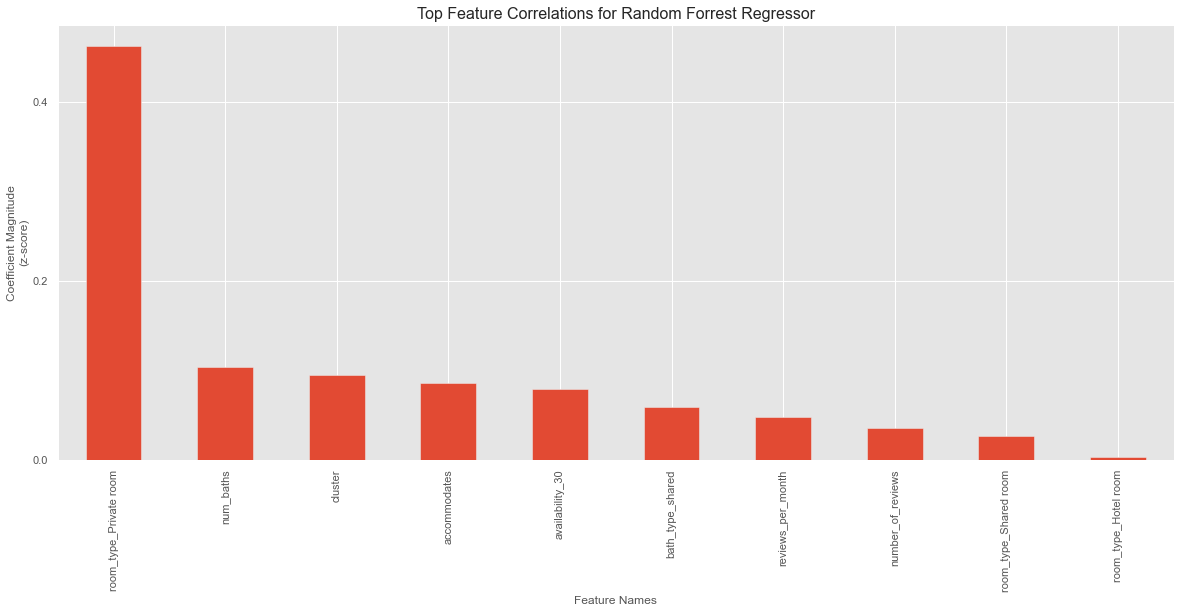

In [42]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

randomForrestReg_wt_plt_df = randomForrestReg_ft_imp_df.head(75)

randomForrestReg_weights = pd.Series(randomForrestReg_wt_plt_df['weights'].values,index=randomForrestReg_wt_plt_df['feature_names'])
ax = randomForrestReg_weights.plot(kind='bar', figsize=(20,8))

sns.set(font_scale=5)
ax.set_title("Top Feature Correlations for Random Forrest Regressor", fontsize=16)
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

In [ ]:
listings_modeling.cluster = pd.Categorical(listings_modeling.cluster)

Categoricals_to_convert = ['cluster']

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(listings_modeling[Categoricals_to_convert],drop_first=True)

#dropping original columns
listings_cluster1 = listings_modeling.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
listings_cluster1 = pd.concat([listings_cluster1,dummies],axis=1)

listings_cluster1.head()

In [ ]:
listings_validation.cluster = pd.Categorical(listings_validation.cluster)

Categoricals_to_convert = ['cluster']

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(listings_validation[Categoricals_to_convert],drop_first=True)

#dropping original columns
validation_cluster1 = listings_validation.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
validation_cluster1 = pd.concat([validation_cluster1,dummies],axis=1)

validation_cluster1.head()

In [ ]:
#Create X and Y for modeling
X_price = listings_cluster1.drop(['id','price','price_log','latitude','longitude','neighbourhood_group_cleansed_Brooklyn','neighbourhood_group_cleansed_Manhattan','neighbourhood_group_cleansed_Queens','neighbourhood_group_cleansed_Staten Island'],axis=1) #droping rating_max
Y_price_log = listings_cluster1['price_log']

#Create new X and Y for validation
X_price_valid = validation_cluster1.drop(['id','price','price_log','latitude','longitude','neighbourhood_group_cleansed_Brooklyn','neighbourhood_group_cleansed_Manhattan','neighbourhood_group_cleansed_Queens','neighbourhood_group_cleansed_Staten Island'],axis=1) #droping rating_max
Y_price_log_valid = validation_cluster1['price_log']

#Standard scale the data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

std.fit(X_price.values) # only std.fit on train set
X_price_std = std.transform(X_price.values)
X_price_valid_std = std.transform(X_price_valid.values)

In [ ]:
#Best model is RandomForestRegressor(min_samples_leaf=10, min_samples_split=5, n_estimators=500)

from sklearn.ensemble import RandomForestRegressor

rfRandomEstimator = RandomForestRegressor(min_samples_leaf=10, min_samples_split=5, n_estimators=500, n_jobs=8, random_state=0)
rfRandomEstimator.fit(X_price_std, Y_price_log)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
rf, rfMae = EvaluateRegressionEstimator('Random Forest Regressor', rfRandomEstimator, X_price_std, Y_price_log, X_price_valid_std, Y_price_log_valid, cv_price)
regModel_stat = regModel_stat.append(rf)

In [ ]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
randomForrestReg_weights = rfRandomEstimator.feature_importances_.ravel()
randomForrestReg_feature_names = X_price_valid.columns.values
randomForrestReg_ft_imp_df = pd.DataFrame({'feature_names':randomForrestReg_feature_names, 'weights':randomForrestReg_weights, 'absolute_weights': np.abs(randomForrestReg_weights)})
randomForrestReg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False)

In [ ]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

randomForrestReg_wt_plt_df = randomForrestReg_ft_imp_df.head(75)

randomForrestReg_weights = pd.Series(randomForrestReg_wt_plt_df['weights'].values,index=randomForrestReg_wt_plt_df['feature_names'])
ax = randomForrestReg_weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations for Random Forrest Regressor", fontsize=16)
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

### This concludes the Joey Eigenvector presentation. 

### DJ's Spectral code. Keeping for reference. 

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import silhouette_score

nclust = [65, 75]
affinity = ["nearest_neighbors"]
train_models_dict = {}

kmeans_silhouette = []
# kmeans_SSE = []
    
for n in range(45,75,10):
    spc = SpectralClustering(n_clusters = n, affinity = "nearest_neighbors")

    # if aff == "precomputed":
    #     print("")
    #     # xknn = kneighbors_graph(LatLong, 10) # additional connectivity information
    #     # labels = spc.fit_predict(xknn)
    #     # label_val = spc.fit_predict(LatLong_val)

    # else:
    
    labels = spc.fit_predict(LatLong)
        # label_val = spc.fit_predict(LatLong_val)

    # key = aff + "_" + str(n)
    # train_models_dict[key] = [labels, label_val]
    # listings_modeling["clusters"] = labels
    # listings_validation["clusters"] = label_val

    kmeans_silhouette.append(silhouette_score(LatLong, spc.labels_, metric='euclidean'))


plt.plot(range(45,75,10), kmeans_silhouette)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Silhouette')
plt.show()

# print(range(10,200,5))

In [ ]:
# from sklearn.cluster import SpectralClustering

# X = LatLong
# nclust = 45

# spc = SpectralClustering(n_clusters = nclust, affinity = "nearest_neighbors")
# labels = spc.fit_predict(X)

# plt.scatter(X[:, 0], X[:, 1], c = labels, cmap=plt.cm.rainbow, s=5, linewidths=0)

# plt.show()

In [ ]:
#Standard scale the data
from sklearn.preprocessing import StandardScaler

#Create X and Y for modeling
X_price = listings_modeling.drop(['id','price','price_log','latitude','longitude'],axis=1) #droping rating_max
Y_price_log = listings_modeling['price_log']

#Create new X and Y for validation
X_price_valid = listings_validation.drop(['id','price','price_log','latitude','longitude'],axis=1) #droping rating_max
Y_price_log_valid = listings_validation['price_log']

std = StandardScaler()

std.fit(X_price.values) # only std.fit on train set
X_price_std = std.transform(X_price.values)
X_price_valid_std = std.transform(X_price_valid.values)

In [37]:
from sklearn.model_selection import KFold

cv_price = KFold(n_splits=10, shuffle=False)

from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, r2_score

def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)
r2_scorer = make_scorer(score_func=r2_score, greater_is_better=True)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer,
                'R2': r2_scorer
               } 

In [38]:
#Create function for regression models
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(modelNme, regEstimator, X, y, x_valid, y_valid, cv):
    
    print('Parameterization of the best estimator:',regEstimator,'\n')

    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    yhat = regEstimator.predict(x_valid)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean RMSE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))

    #print R2 for all folds 
    R2avg = scores['test_R2'].mean()
    print_str = "The average R2 for all cv folds is: \t\t\t {R2avg:.5}"
    print(print_str.format(R2avg=R2avg))
    print('---------------------------------------------------------------------')

    model_stat = pd.DataFrame()
    model_stat['Model_name'] = [str(modelNme)]
    model_stat['MAE_model'] = scores['test_MAE'].mean()
    model_stat['MAPE_model'] = scores['test_MAPE'].mean()
    model_stat['RMSE_model'] = scores['test_RMSE'].mean()
    model_stat['R2_model'] = scores['test_R2'].mean()
    model_stat['MAE_validation'] = mean_absolute_error(y_valid, yhat)
    model_stat['MAPE_validation'] = mape(y_valid, yhat)
    model_stat['RMSE_validation'] = rmse(y_valid, yhat)
    model_stat['R2_validation'] = r2_score(y_valid, yhat)

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    scoresResults['R2'] = scores['test_R2']
    print(scoresResults)
    
    return model_stat, model_stat['MAE_validation']

In [ ]:
#Best model is RandomForestRegressor(min_samples_leaf=10, min_samples_split=5, n_estimators=500)

from sklearn.ensemble import RandomForestRegressor

#Create dataframe to collect regression models stat
regModel_stat = pd.DataFrame()


rfRandomEstimator = RandomForestRegressor(min_samples_leaf=10, min_samples_split=5, n_estimators=500, n_jobs=8, random_state=0)
rfRandomEstimator.fit(X_price_std, Y_price_log)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
rf, rfMae = EvaluateRegressionEstimator('Random Forest Regressor', rfRandomEstimator, X_price_std, Y_price_log, X_price_valid_std, Y_price_log_valid, cv_price)
regModel_stat = regModel_stat.append(rf)

In [ ]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
randomForrestReg_weights = rfRandomEstimator.feature_importances_.ravel()
randomForrestReg_feature_names = X_price_valid.columns.values
randomForrestReg_ft_imp_df = pd.DataFrame({'feature_names':randomForrestReg_feature_names, 'weights':randomForrestReg_weights, 'absolute_weights': np.abs(randomForrestReg_weights)})
randomForrestReg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False)

In [ ]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

randomForrestReg_wt_plt_df = randomForrestReg_ft_imp_df.head(75)

randomForrestReg_weights = pd.Series(randomForrestReg_wt_plt_df['weights'].values,index=randomForrestReg_wt_plt_df['feature_names'])
ax = randomForrestReg_weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations for Random Forrest Regressor", fontsize=16)
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

# Spectral: kneighbors (pre-computed)

In [ ]:
from sklearn.cluster import SpectralClustering

X = LatLong
nclust = 45
xknn = kneighbors_graph(X, 10) # additional connectivity information

spc = SpectralClustering(n_clusters = nclust, affinity = "precomputed")
labels = spc.fit_predict(xknn)

plt.scatter(X[:, 0], X[:, 1], c = labels, cmap=plt.cm.rainbow, s=5, linewidths=0)

plt.show()

# Spectral: custom (pre-computed)

In [ ]:
# from sklearn.cluster import SpectralClustering
# from sklearn.metrics import pairwise_distances

# X = LatLong
# nclust = 45

# d = pairwise_distances(X, metric='euclidean')
# d = np.exp(- d**2 / (2*0.1**2)) # making sure euclidean distance does not exceed one

# spc = SpectralClustering(n_clusters = nclust, affinity = "precomputed", eigen_solver ="arpack")
# labels = spc.fit_predict(d)

# plt.scatter(X[:, 0], X[:, 1], c = labels, cmap=plt.cm.rainbow, s=5, linewidths=0)

# plt.show()